In [3]:
import os, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
#path
path_root = '/home/yassinebha/data/data_disk/data/HCP/SPM'

In [6]:
list_folder = glob.glob(os.path.join(path_root,'*'))

In [7]:
list_folder.remove(glob.glob(os.path.join(path_root,'*.nii.gz'))[0])

In [8]:
list_folder

['/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_wm_activation_maps_24-Aug-2017',
 '/home/yassinebha/data/data_disk/data/HCP/SPM/corr_social.csv',
 '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_language_story_activation_maps_22-Feb-2017',
 '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_emotion_activation_maps_17-Jun-2017',
 '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_motor_activation_maps_19-Jun-2017',
 '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_gamb_activation_maps_18-Jun-2017',
 '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_relational_activation_maps_12-Jun-2017',
 '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_social_activation_maps_19-Aug-2017']

In [9]:
list_folder = ['/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_social_activation_maps_19-Aug-2017',
               '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_language_story_activation_maps_22-Feb-2017',
               '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_wm_activation_maps_24-Aug-2017',
               '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_relational_activation_maps_12-Jun-2017',
               '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_emotion_activation_maps_17-Jun-2017',
               '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_motor_activation_maps_19-Jun-2017',
               '/home/yassinebha/data/data_disk/data/HCP/SPM/hcp_gamb_activation_maps_18-Jun-2017']

In [10]:
df_all = pd.DataFrame()
for folder in list_folder:
    task_name = folder.split('/')[-1].split('_')[1]
    if task_name == 'gamb':
        task_name ='gambling' 
    
    df_ = pd.read_csv(os.path.join(folder,'corr_list_{}.csv'.format(task_name)))
    df_all = df_all.append(df_)

In [11]:
df_all.head()

,Unnamed: 0,Task,Condition,Zygosity,Correlation
0,0,mental_MZ,mental,MZ,0.318760
1,1,mental_MZ,mental,MZ,0.266338
2,2,mental_MZ,mental,MZ,0.201994
3,3,mental_MZ,mental,MZ,0.382375
4,4,mental_MZ,mental,MZ,0.475916


In [12]:
len(df_all.Condition.unique())

21

In [13]:
dict_abbrev = {'mental':'Mt',
 'mental_vs_rnd':'Mt-R',
 'rnd':'RM1',
 'story':'S-M',
 '0bk':'0B',
 '2bk':'2B',
 '2bk_vs_0bk':'0B-2B',
 'match':'M',
 'relation':'R',
 'relation_vs_match':'M-R',
 'neut':'RM2',
 'fear':'RM3',
 'fear_vs_neut':'F-N',
 'rh':'RH',
 'lh':'LH',
 'rf':'RF',
 'lf':'LF',
 't':'T',
 'win':'W',
 'loss':'L',
 'win_vs_loss':'W-L'}

In [14]:
dict_abbrev

{'0bk': '0B',
 '2bk': '2B',
 '2bk_vs_0bk': '0B-2B',
 'fear': 'RM3',
 'fear_vs_neut': 'F-N',
 'lf': 'LF',
 'lh': 'LH',
 'loss': 'L',
 'match': 'M',
 'mental': 'Mt',
 'mental_vs_rnd': 'Mt-R',
 'neut': 'RM2',
 'relation': 'R',
 'relation_vs_match': 'M-R',
 'rf': 'RF',
 'rh': 'RH',
 'rnd': 'RM1',
 'story': 'S-M',
 't': 'T',
 'win': 'W',
 'win_vs_loss': 'W-L'}

In [15]:
df_all.replace({'Condition':dict_abbrev},inplace=True)
df_all.replace({'Zygosity':{'NotMZ':'DZ',
                            'NotTwin':'Siblings',
                            'UnR':'Unrelated'}},inplace=True)

In [16]:
df_all = df_all[~df_all['Condition'].isin(['RM1','RM2','RM3'])]

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


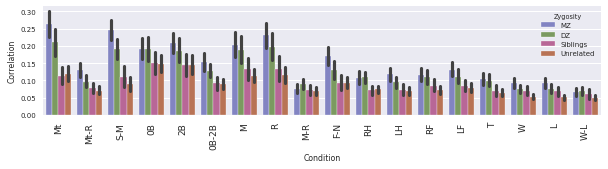

In [23]:
# color for each zygocity type
coll_ = ["#777acd",
         "#7aa456",
         "#c65999",
         "#c96d44"]
coll_list = coll_ * len(df_all.Condition.unique())

sns.set_style("white")
plt.figure(figsize=(10,2))
sns.set(font_scale=0.7)
ax = sns.barplot(x='Condition', y='Correlation', palette=coll_list,hue = 'Zygosity',edgecolor='white',data=df_all)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(9)
plt.savefig('/home/yassinebha/data/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/Figures/spm_correlations/corr_all_task_test.svg')

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


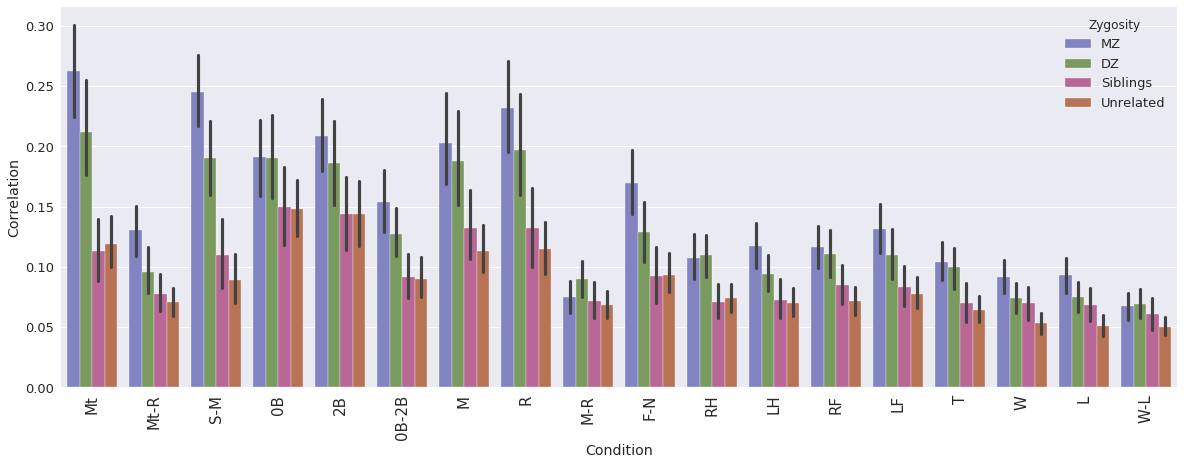

In [42]:
# color for each zygocity type
coll_ = ["#777acd",
         "#7aa456",
         "#c65999",
         "#c96d44"]
coll_list = coll_ * len(df_all.Condition.unique())

sns.set_style("white")
plt.figure(figsize=(20,7))
sns.set(font_scale=1.3)
ax = sns.barplot(x='Condition', y='Correlation', palette=coll_list,hue = 'Zygosity',edgecolor='white',data=df_all)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(15)
plt.savefig('/home/yassinebha/data/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/Figures/spm_correlations/corr_all_task_test.svg')

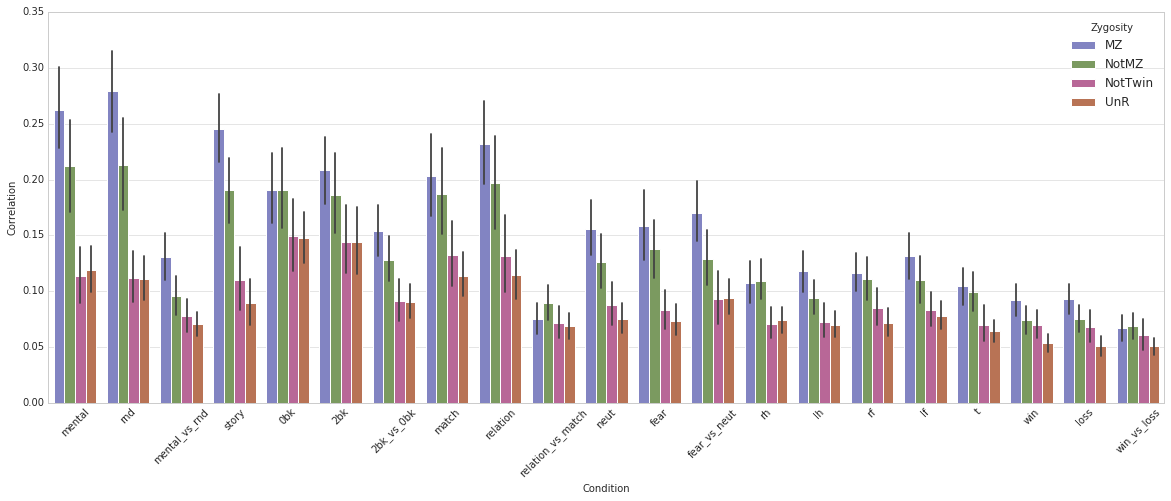

In [12]:
# color for each zygocity type
coll_ = ["#777acd",
         "#7aa456",
         "#c65999",
         "#c96d44"]
coll_list = coll_ * len(df_all.Condition.unique())

sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
ax = sns.barplot(x='Condition', y='Correlation', palette=coll_list,hue = 'Zygosity',edgecolor='white',data=df_all)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.savefig('/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/Figures/spm_correlations/corr_all_task.svg')